In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [124]:
dataHosp = pd.read_csv('../data/Hospitales_Normalizados.csv', index_col=0)

In [125]:
X = dataHosp.drop(['HOSPITALIZACION'], axis = 1)
y = dataHosp['HOSPITALIZACION']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [127]:
# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

In [128]:
# Entrenamos el modelo
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [129]:
y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

In [130]:
#Para crear la matriz de confusión


matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

#Para visualizar


cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

#para obtener el valor de precisión, recall, F1-score y soporte para cada clase en un problema de clasificación


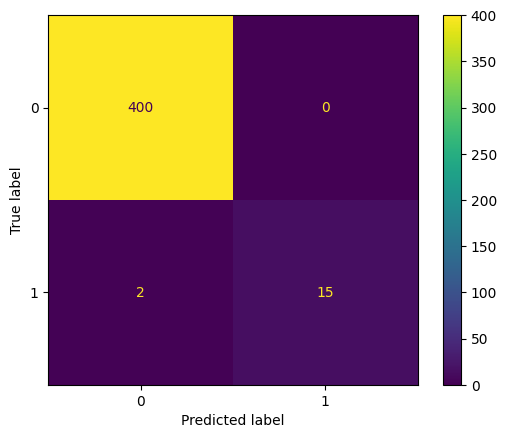

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      0.88      0.94        17

    accuracy                           1.00       417
   macro avg       1.00      0.94      0.97       417
weighted avg       1.00      1.00      1.00       417



In [131]:
cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

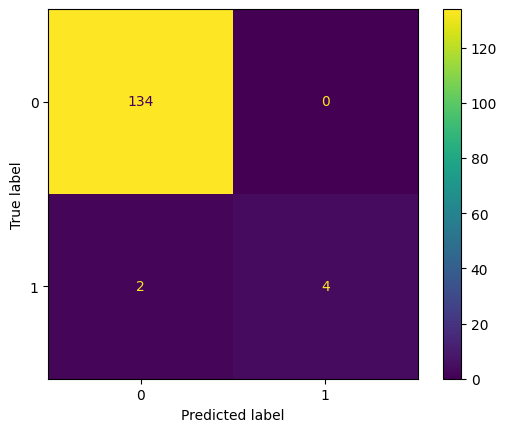

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.99      1.00      0.99       134
           1       1.00      0.67      0.80         6

    accuracy                           0.99       140
   macro avg       0.99      0.83      0.90       140
weighted avg       0.99      0.99      0.98       140



In [132]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

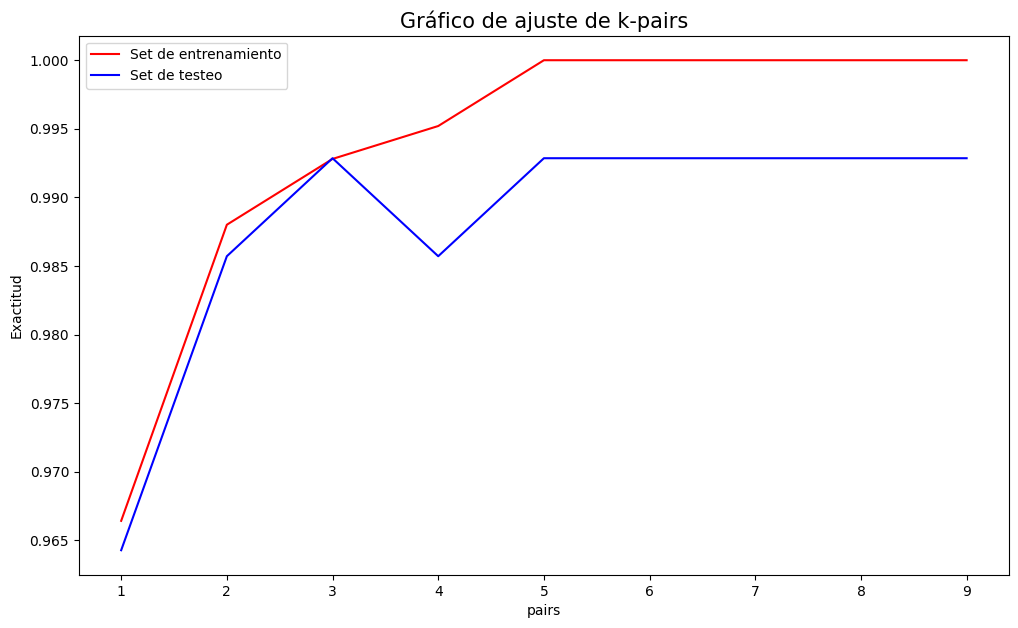

In [133]:
train_prec = []
test_prec = []
max_pairs = list(range(1, 10))

for n in max_pairs:
    clfx = DecisionTreeClassifier(max_depth=n, criterion='entropy')
    clfx.fit(X_train, y_train)
    train_prec.append(clfx.score(X_train, y_train))
    test_prec.append(clfx.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_pairs, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_pairs, test_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de k-pairs', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('pairs')
plt.show()    

In [134]:
feature_names = list(X.columns)
importances = clf.feature_importances_

# Imprime los nombres de los features junto con sus importancias
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

DIABETES: 0.0
HOSPITALIZACIÓN ULTIMO MES: 0.0168059031555975
PSA: 0.4503310380811439
VOLUMEN PROSTATICO: 0.0
NUMERO DE MUESTRAS TOMADAS: 0.0022971255081749944
ENF. CRONICA PULMONAR OBSTRUCTIVA: 0.0
FIEBRE: 0.5305659332550836
ITU: 0.0


In [135]:
X = dataHosp.drop(['DIABETES','VOLUMEN PROSTATICO','ENF. CRONICA PULMONAR OBSTRUCTIVA'], axis = 1)
y = dataHosp['HOSPITALIZACION']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [137]:
# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

# Entrenamos el modelo
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [138]:
y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

In [139]:
#Para crear la matriz de confusión
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

#Para visualizar
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

#para obtener el valor de precisión, recall, F1-score y soporte para cada clase en un problema de clasificación
from sklearn.metrics import classification_report

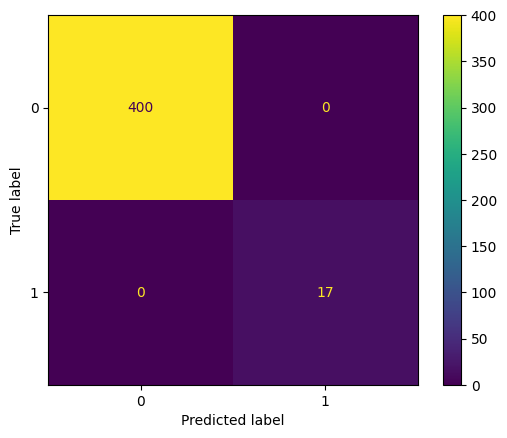

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00        17

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417



In [140]:
cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

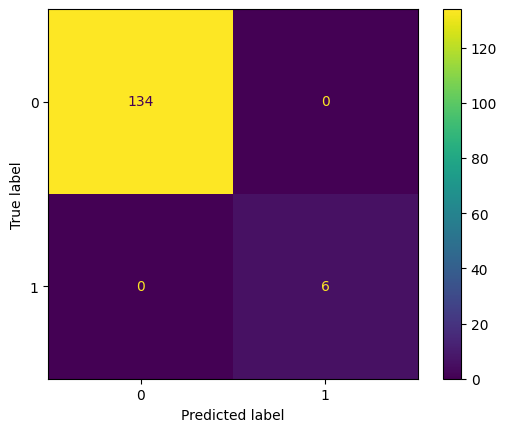

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00         6

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [141]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

In [142]:
from sklearn.preprocessing import label_binarize

# Binarizamos y_test

y_test2 = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test2.shape[1]
print(y_test2[:5])


[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [143]:
y_score = clf.predict_proba(X_test)
print(y_score[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [144]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes-1):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

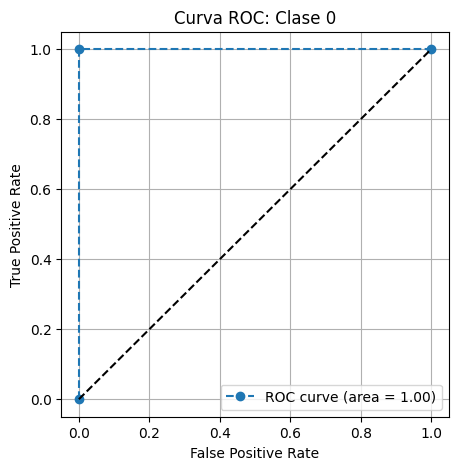

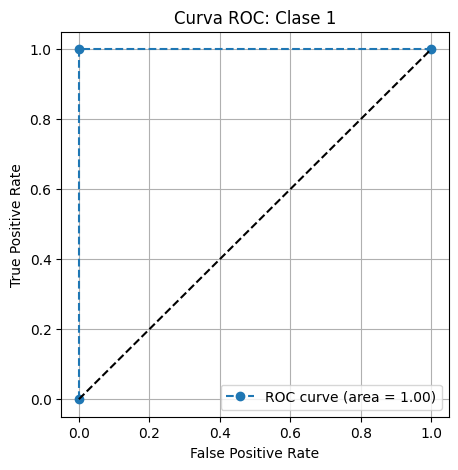

In [145]:
# Recorremos con un bucle cada una de las clases
for i in range(n_classes-1):
    plt.figure(figsize=(5,5))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()